# Laboratorio percettrone

In [1]:
%plot -f svg
graphics_toolkit("gnuplot")

## Implementazione del percettrone

Classifica un insieme di pattern in due classi.
Gli inputs sono reali e gli output sono bipolari, 1 o -1.

- Ci sono $m$ inputs più l'input del bias, posto sempre uguale a -1.
- Ci sono $m+1$ pesi che connettono gli input e il bias con l'unico output y.
- Gli $m+1$ pesi compongono un vettore $W$, inizialmente casuale.
- La funzione di attivazione è il segno.

In entrata viene data una matrice $X$ (input) che ha $m$ colonne, una per input, e $t$ righe, dove $t$ è il numero dei pattern da apprendere.
I pattern sono $m$-dimensionali.

In ingresso viene dato anche il vettore colonna $T$ (target) di $t$ righe,
che contiene i valori da apprendere (+1 o -1, che identificano le due classi).
$n$ è il numero di epoche fissate per l'apprendimento.

Uso: `[a, b] = percett(X, T, n);`

$a$ contiene la storia dei pesi e $b$ la storia del numero di patterns appresi.

In [2]:
function [storiapesi,storiappresi]=percett(X,T,n);
    [t, m] = size(X); 
    W = rand(1, m+1);
    
    X(:, m+1) =- ones(t,1);
    storiapesi = zeros(m+1,n); 
    storiappresi = zeros(1,n);

    for i=1:n
        storiapesi(:,i)=W'; 
        Y=sign(W*X'); %Y è un vettore riga che contiene le t uscite
        storiappresi(i)=sum(T'==Y);
        for j=1:t
            if ne(Y(j),T(j))
                W=W+T(j)*X(j,:); 
            end
        end
    end
end

Utilizza il percettrone dopo che i pattern sono stati appresi.
Riceve $W$ e una matrice di pattern, e restituisce una colonna di risposte, una per ogni pattern.

In [7]:
function ris = usaperc(W,P);
    % t patterns m dimensionali
    [t, m] = size(P);
    
    % si aggiunge una colonna di -1 a P: è il valore fisso del bias
    P(:, m+1) =- ones(t,1); 

    w=size(W,2);

    if ne(w,m+1)
       error('dimensioni errate!')
    end

    ris=sign(W*P')';
end

### Esempio sul dataset `fung.mat`:

percentuale appresa correttamente : 99.507632 per cento 
z =  4024
risultati corretti su funghi mai visti : 99.064500 per cento 


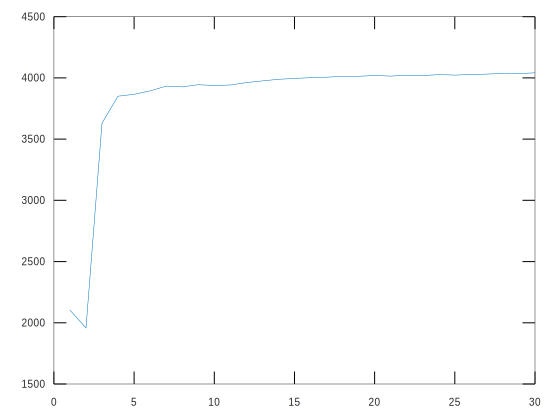

In [4]:
load fung

% presuppone che fung sia stato caricato e che ci sia in memoria la matrice fun 8124x127

% coppie di apprendimento

fun1i=fun(1:4062,1:125);
fun1t=2*fun(1:4062,126)-1;

% coppie per il test
fun2i=fun(4063:8124,1:125);
fun2t=2*fun(4063:8124,126)-1;

rand('state',1992)

% apprendimento
[u,v]=percett(fun1i,fun1t,30);

figure(1)
plot(v)
fprintf('percentuale appresa correttamente : %f per cento \n',(max(v)/4062)*100)

% indice del primo massimo
[hh,h]=max(v);

% riga dei pesi ottimale
W=u(:,h)';

%test

ris=usaperc(W,fun2i);
z=sum(ris==fun2t)
fprintf('risultati corretti su funghi mai visti : %f per cento \n',(z/4062)*100)


### Esempio sul dataset `cancer.m`

risposte corrette - nella fase di apprendimento - su 350 
ans =  338
risposte corrette - nella fase di test - su 349 
ans =  340


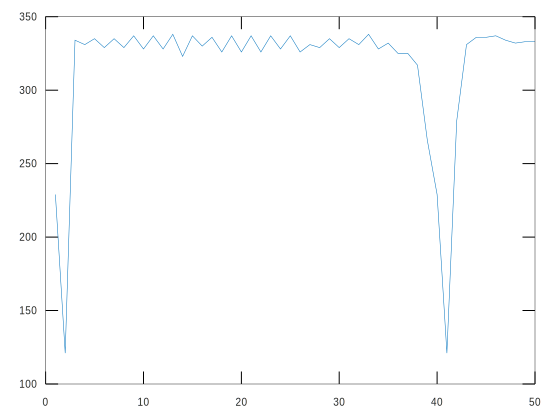

In [6]:
load cancer1
% si suppone caricata cancer1; in memoria cancer1 699X11

% coppie di apprendimento
cancer1i=cancer1(1:350,1:9);
cancer1t=2*cancer1(1:350,10)-1;

% coppie per il test
cancer2i=cancer1(351:699,1:9);
cancer2t=2*cancer1(351:699,10)-1;

rand('state',1992)

% apprendimento
[u,v]=percett(cancer1i,cancer1t,50);

display('risposte corrette - nella fase di apprendimento - su 350 ')
max(v)
figure(1)
plot(v)

% indice del primo massimo
[z,h]=max(v); 

% riga dei pesi ottimale
W=u(:,h)'; 

% test

ris=usaperc(W,cancer2i);

display('risposte corrette - nella fase di test - su 349 ')
sum(ris==cancer2t)


# Esercizi di laboratorio
1. Commentare il codice di percett.m, descrivendo a cosa corrisponde ogni istruzione. Si specifichi anche la dimensione delle variabili (numero di righe, numero di colonne), cercando di capire il perché di questi valori.
2. Visualizzare le prime 5 colonne delle prime 10 righe della matrice fun1i
3. Cambiare il numero delle iterazioni previste nell’algoritmo di percett.m
4. Che significato hanno le variabili t ed n definite in percett.m?
5. Perche’ W ha dimensione m+1?
6. Cosa contengono le variabili storiapesi e storiappresi in uscita dopo l’esecuzione di      percett?
7. In percett.m qual è l’istruzione di updating del vettore dei pesi?
8. Si consideri funghi.m, commentando ogni istruzione. Si commenti anche usaperc.m.
9. In quale gruppo di istruzioni i pesi vengono utilizzati sul test set e non più sul training set?
10. A cosa si riferiscono le percentuali visualizzate?
11. Modificare il numero di iterazioni per vedere se  il risultato cambia
12. Si ripetano i due punti sopra per cancer.
13. C’è una discrepanza fondamentale tra questa implementazione e l’algoritmo visto a lezione: qui l’errore è calcolato per epoch. Fare in modo invece che sia calcolato pattern by pattern.
